In [38]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Уравнение переноса

Численно решим уравнение переноса, представленное ниже, и сравним результат с аналитическим решением

Уравнение:
$$ \frac{\partial u}{\partial t} + 2 \frac{\partial u}{\partial x} = x^2 + 4 x t = f(x, t) $$
Начальные условия:
$$ u(x, 0) = \sin(10 \pi x) = \phi(x) $$
$$ u(0, t) = t^2 = \psi(t) $$

Аналитическое решение:
- Аналитическое решение соответствующего однородного будет иметь следующий вид:
$$ u_0(x, t) = \phi(x - 2t) + \psi(t - \frac{x}{2}) $$
(Считаем, что $\phi$ и $\psi$ тождественно равны нулю вне области задачи)
- Частное решение исходного уравнения с нулевыми начальными и граничными условиями будет иметь вид:
$$ u_1 = x^2 t $$
$$ u = u_1 + u_2 = \phi(x - 2t) + \psi(t - \frac{x}{2}) + x^2 t = \sin(10 \pi (x - 2t)) + (t - \frac{x}{2})^2 + x^2 t $$



In [39]:
!rm -f task8_1_data/*
!cd comp_math_rs && cargo run --release --bin task8_1

   Compiling comp_math_rs v0.1.0 (/home/vlad/Documents/VSCode/MiptCompMath/comp_math_rs)
    Finished `release` profile [optimized] target(s) in 0.87s              
     Running `target/release/task8_1`


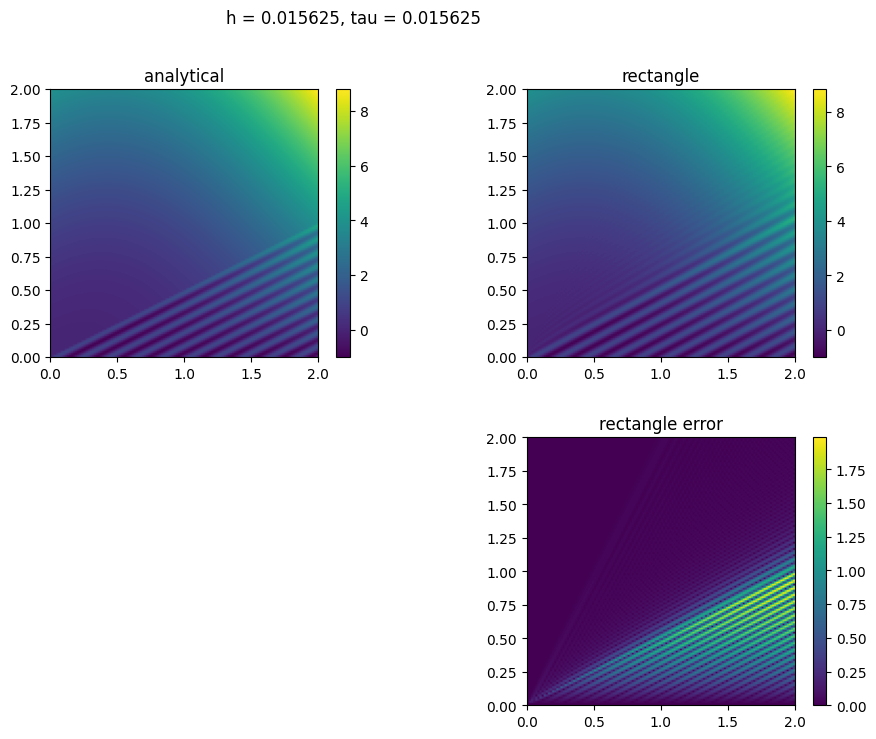

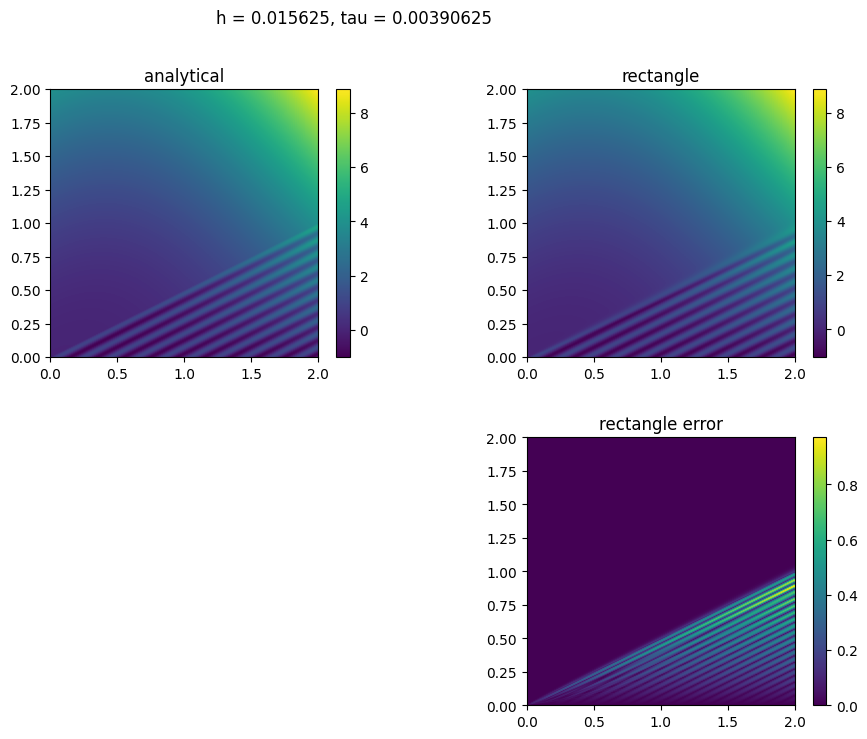

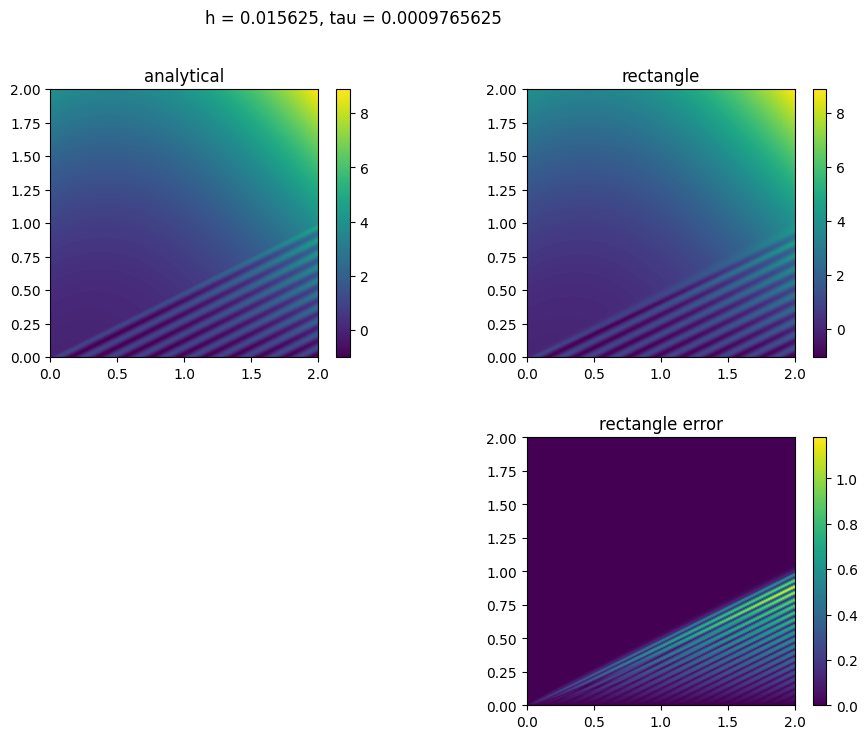

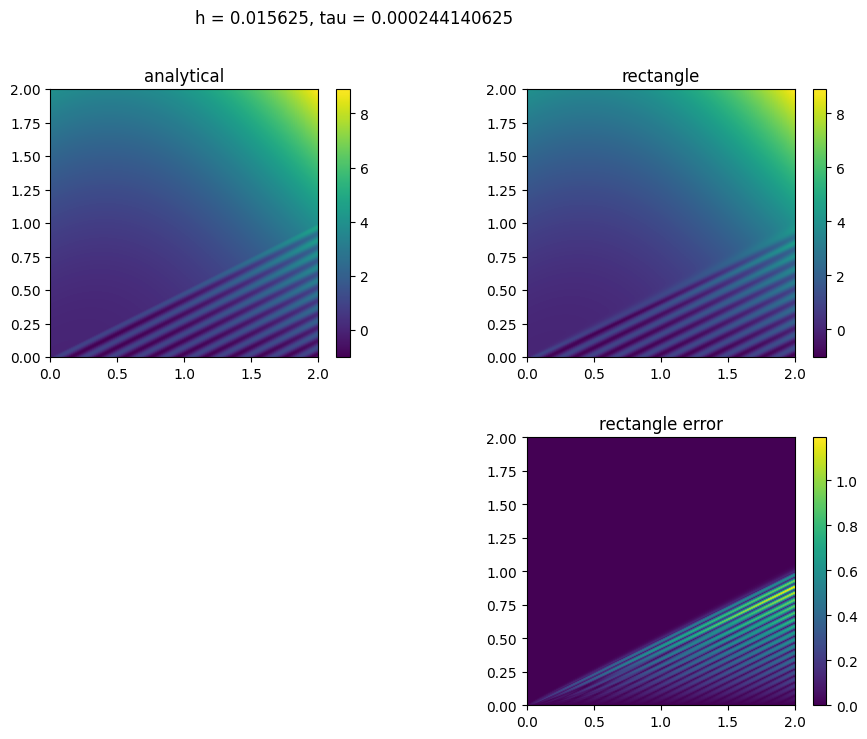

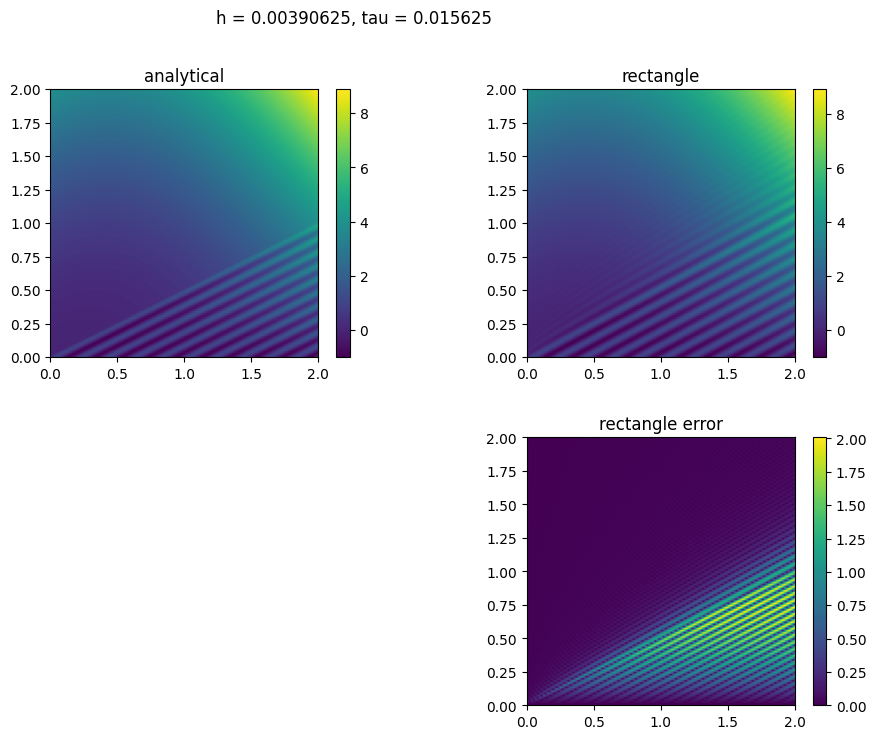

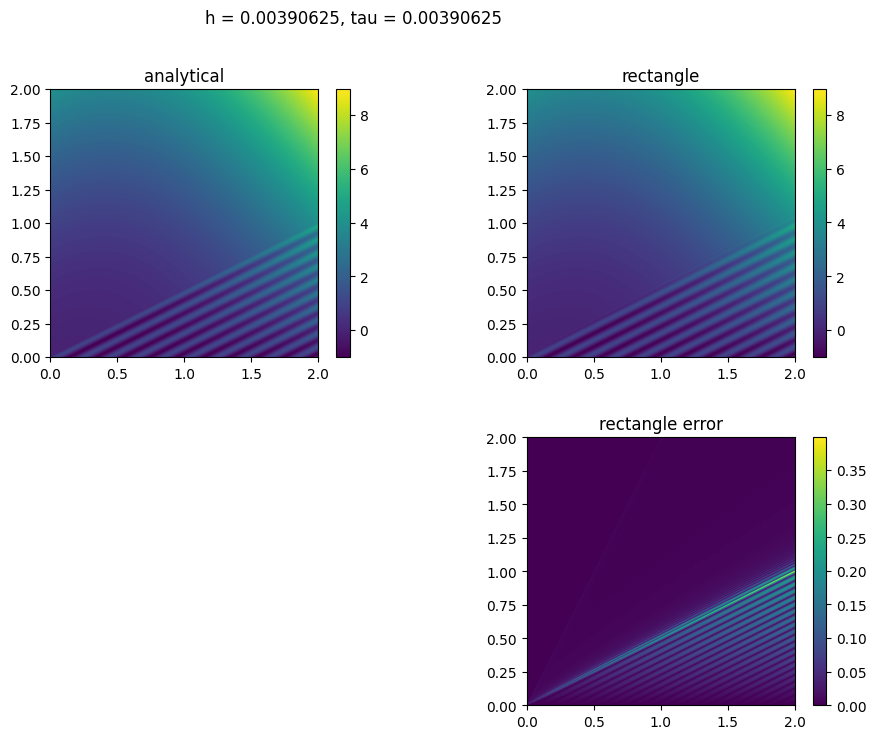

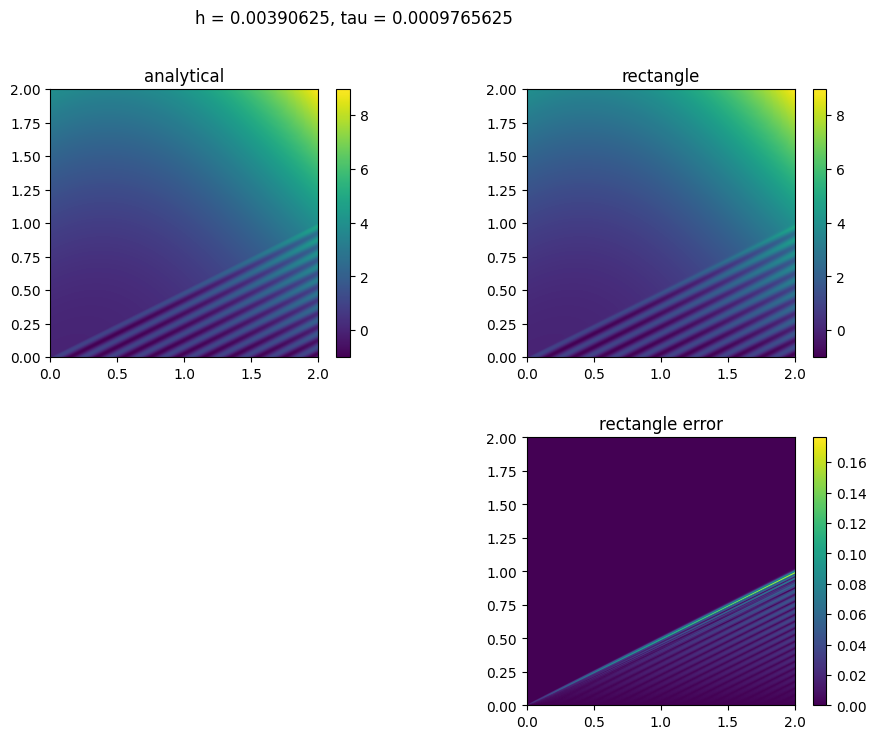

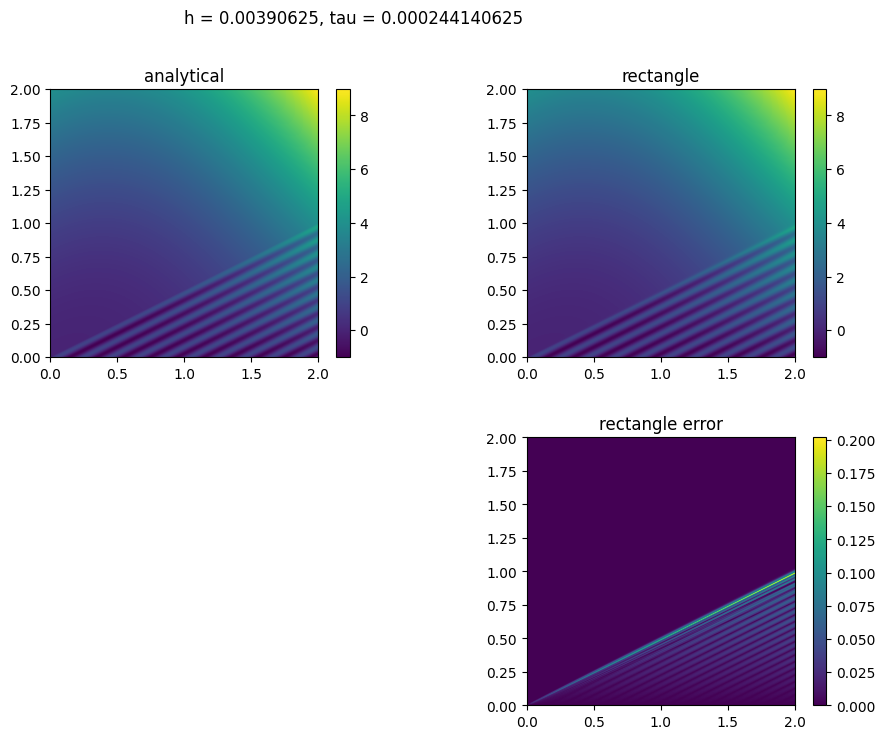

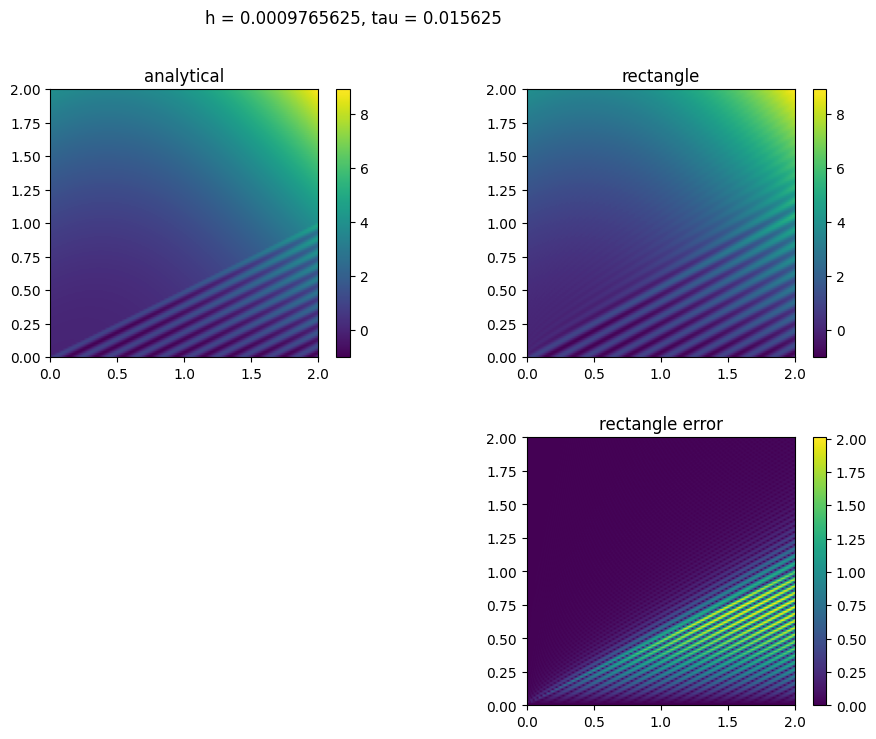

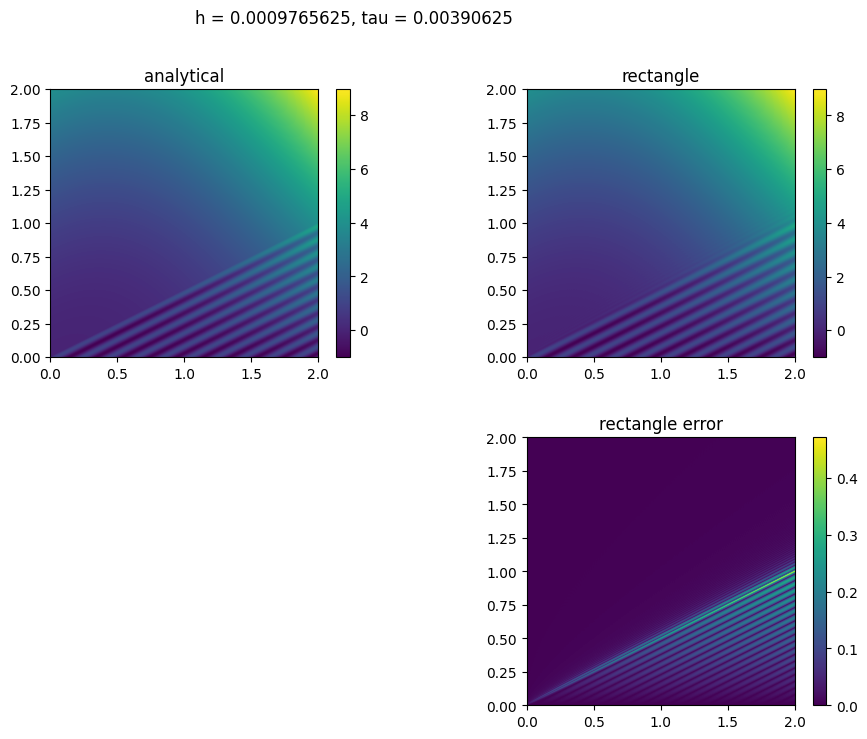

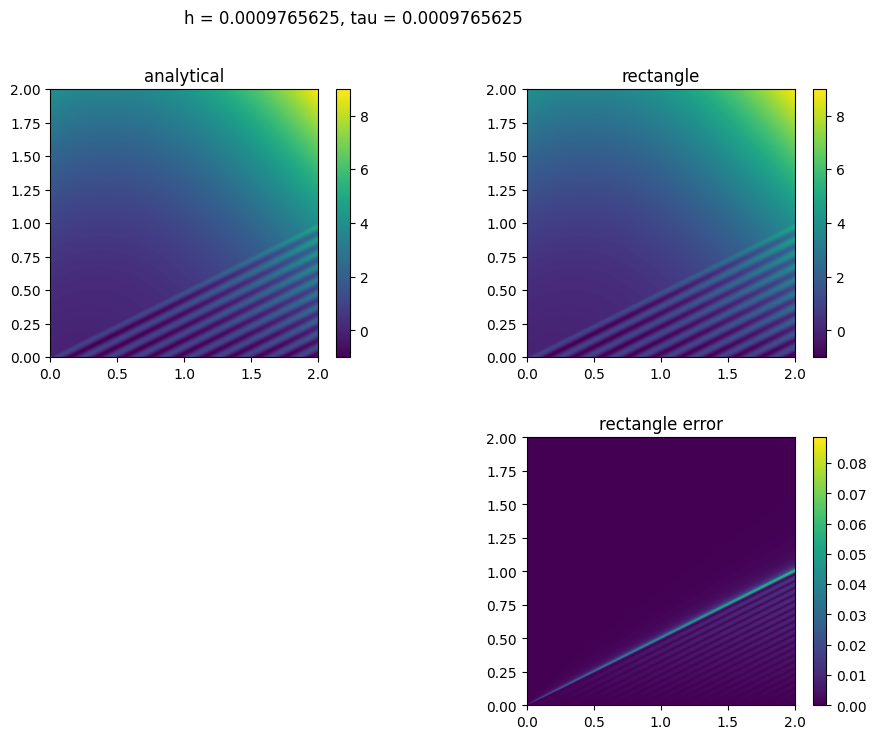

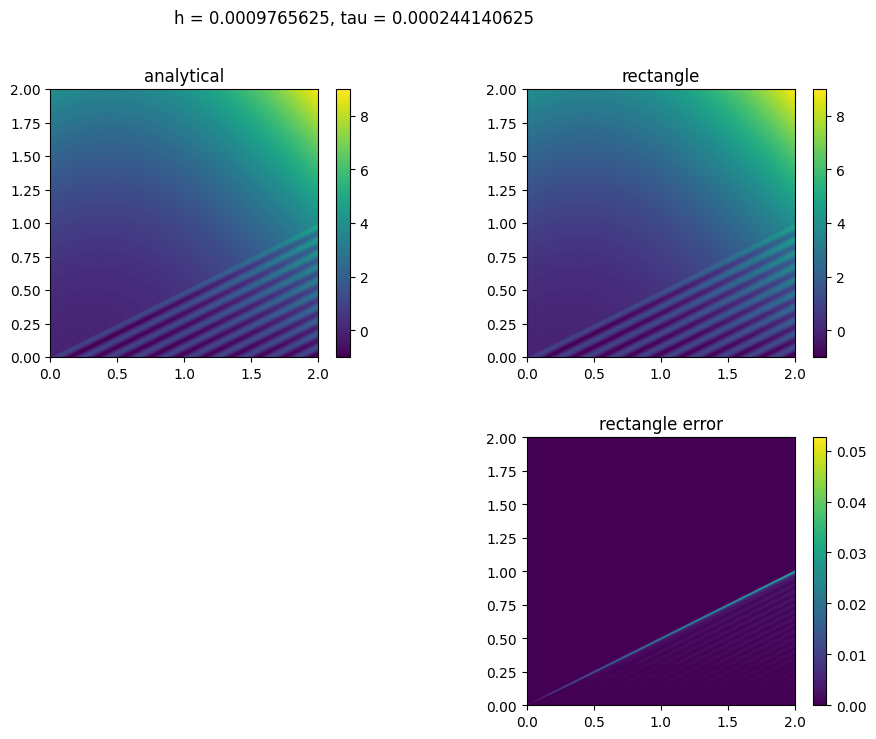

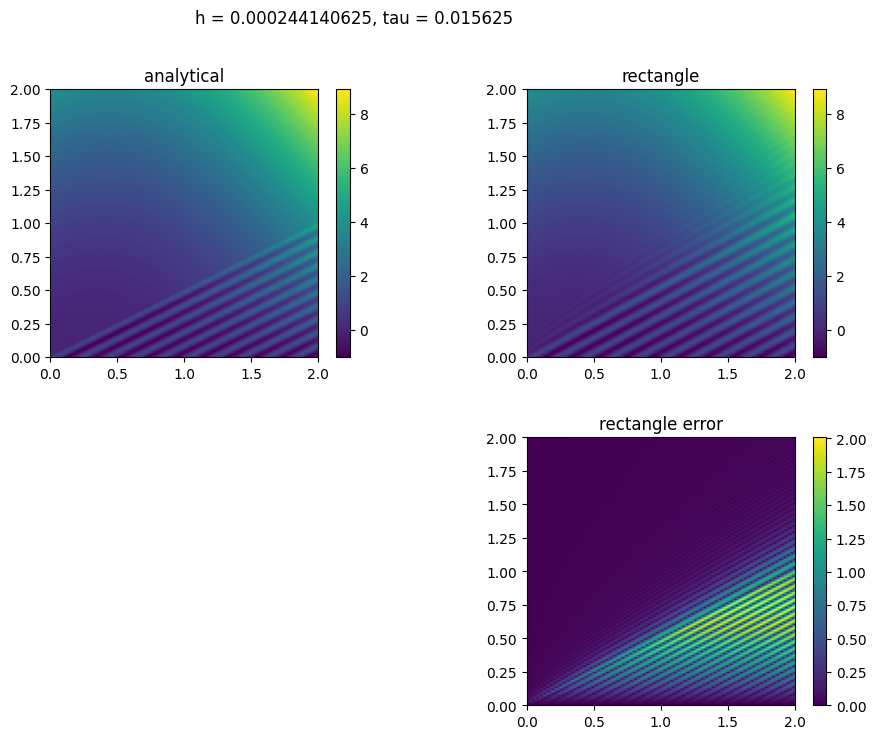

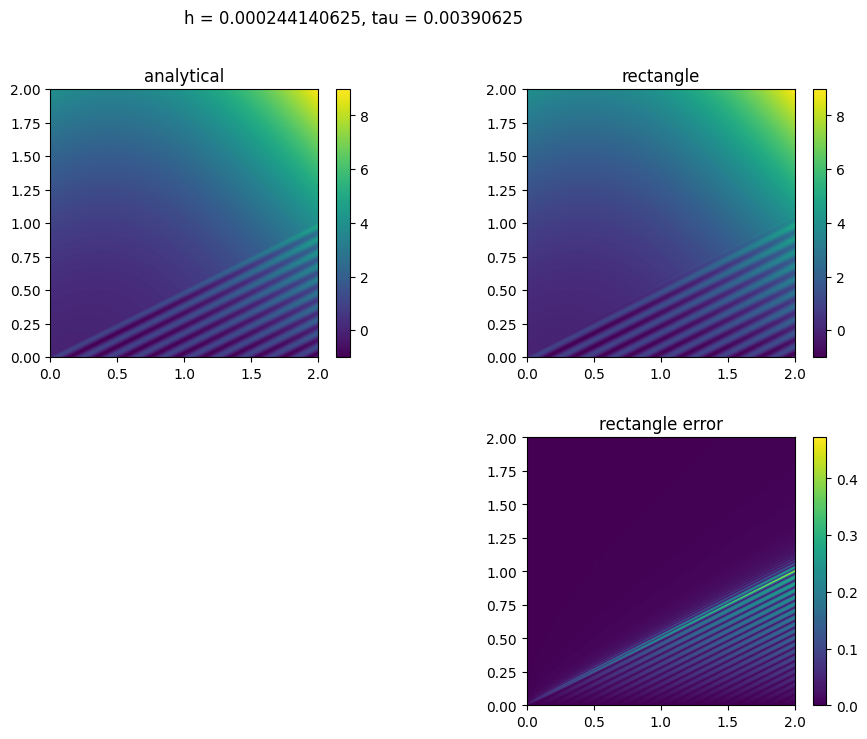

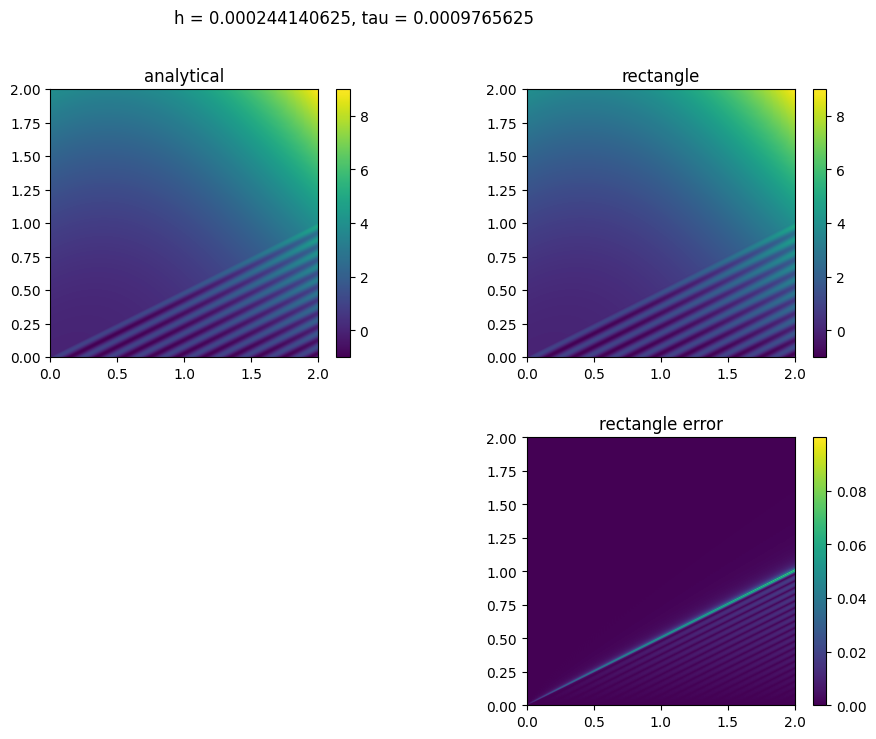

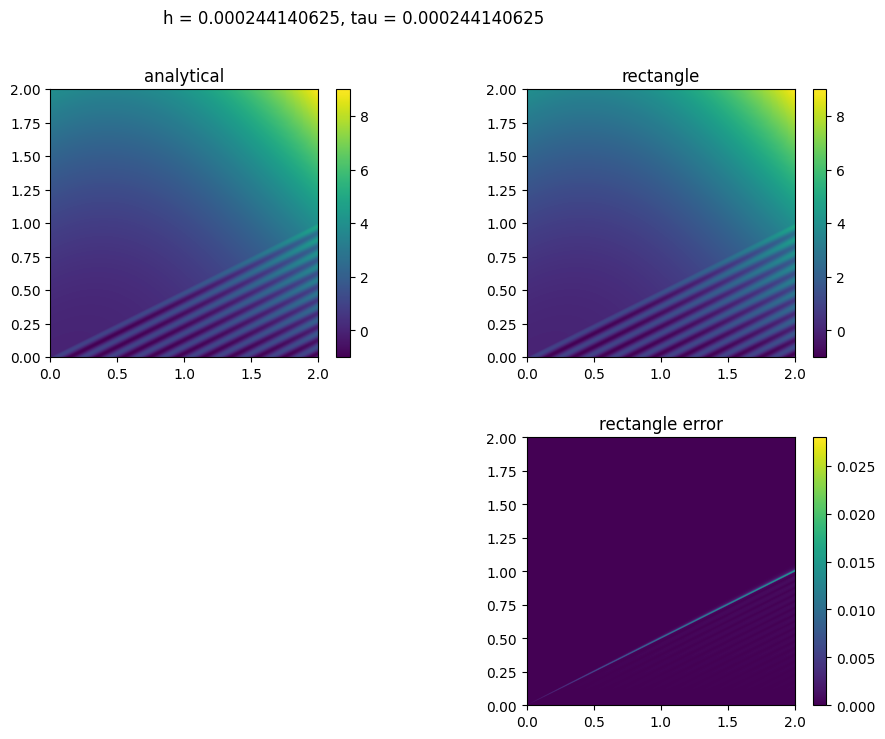

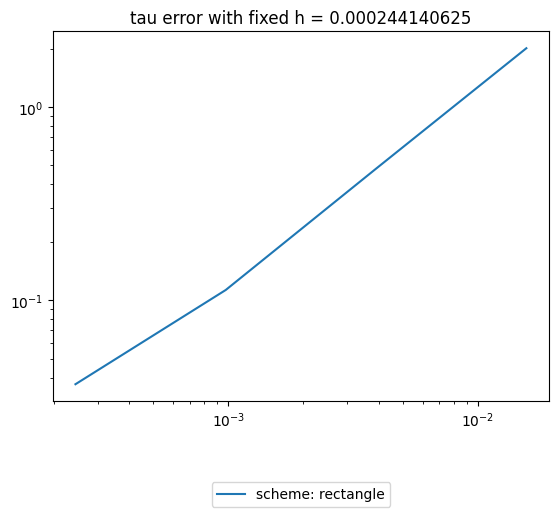

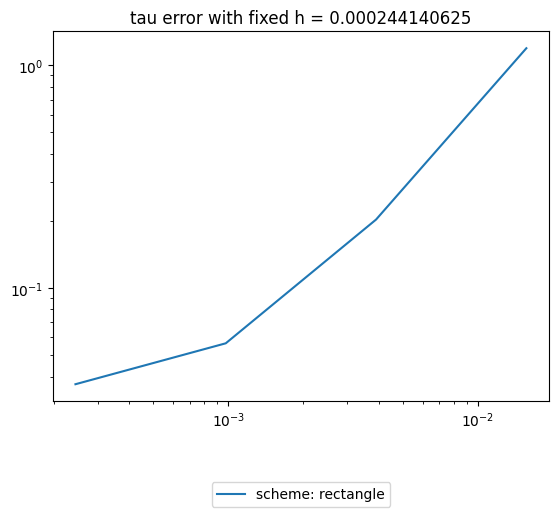

In [40]:
directory = "task8_1_data"

h_error = {}
tau_error = {}

schemes = ["rectangle"]

for scheme in schemes:
    h_error[scheme] = {}
    tau_error[scheme] = {}

for h_pow in range(3, 7):
    for tau_pow in range(3, 7):        
        fig = plt.figure(figsize=(12, 8))
        gs = gridspec.GridSpec(2, len(schemes) + 1, wspace=0.05, hspace=0.3, height_ratios=[1, 1], width_ratios=[1]*(len(schemes) + 1))
        
        with open(f"{directory}/analytical_{h_pow}_{tau_pow}.csv", "r") as f:
            h = float(f.readline()) 
            tau = float(f.readline())
            error = float(f.readline())
            time = float(f.readline())

            data = []

            for line in f:
                data.append(list(map(float, line.split(",")[:-1])))
            
            data = data[::-1]
            
            fig.suptitle(f"{h = }, {tau = }")
            ax_ref = plt.subplot(gs[0, 0])
            im_ref = ax_ref.imshow(data, cmap="viridis", extent=[0, 2, 0, 2])
            ax_ref.set_title("analytical")
            plt.colorbar(im_ref, ax=ax_ref, fraction=0.046, pad=0.04)
            
            analytical_data = data.copy()

        for scheme in schemes:
            with open(f"{directory}/{scheme}_{h_pow}_{tau_pow}.csv", "r") as f:
                h = float(f.readline()) 
                tau = float(f.readline())
                error = float(f.readline())
                time = float(f.readline())

                data = []

                for line in f:
                    data.append(list(map(float, line.split(",")[:-1])))
                
                data = data[::-1]
                
                ax_ref = plt.subplot(gs[0, schemes.index(scheme) + 1])
                im_ref = ax_ref.imshow(data, cmap="viridis", extent=[0, 2, 0, 2])
                ax_ref.set_title(scheme)
                plt.colorbar(im_ref, ax=ax_ref, fraction=0.046, pad=0.04)

            for i in range(len(data)):
                for j in range(len(data[i])):
                    data[i][j] = abs(data[i][j] - analytical_data[i][j])
        
            if h not in h_error[scheme].keys():
                h_error[scheme][h] = {}
            h_error[scheme][h][tau] = error
            
            if tau not in tau_error[scheme].keys():
                tau_error[scheme][tau] = {}
            tau_error[scheme][tau][h] = error
            
            ax_ref = plt.subplot(gs[1, schemes.index(scheme) + 1])
            im_ref = ax_ref.imshow(data, cmap="viridis", extent=[0, 2, 0, 2])
            ax_ref.set_title(f"{scheme} error")
            plt.colorbar(im_ref, ax=ax_ref, fraction=0.046, pad=0.04)
            
        plt.show()


h = min(h_error[schemes[0]].keys())
plt.xscale("log")
plt.yscale("log")
plt.title(f"tau error with fixed {h = }")
for scheme in schemes:
    plt.plot(h_error[scheme][h].keys(), h_error[scheme][h].values(), label=f"scheme: {scheme}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()

tau = min(tau_error[schemes[0]].keys())
plt.xscale("log")
plt.yscale("log")
plt.title(f"tau error with fixed {h = }")
for scheme in schemes:
    plt.plot(tau_error[scheme][tau].keys(), tau_error[scheme][tau].values(), label=f"scheme: {scheme}")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()
